In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from pandas_datareader import data

In [2]:
df = data.DataReader(['ADA-USD', 'BCH-USD', 'BNB-USD', 'BTC-USD', 'DASH-USD', 'EOS-USD', 'ETH-USD', 'MIOTA-USD', 'LINK-USD', 'LTC-USD', 'TRX-USD', 'USDT-USD', 'XLM-USD', 'XMR-USD', 'XRP-USD'], 'yahoo', start='2018/01/01', end='2019/12/31')
df = df['Adj Close']
print(df.head())

Symbols      ADA-USD      BCH-USD  BNB-USD       BTC-USD     DASH-USD  \
Date                                                                    
2017-12-31  0.719695  2533.010010  8.63558  14156.400391  1051.680054   
2018-01-01  0.728657  2432.540039  8.41461  13657.200195  1053.979980   
2018-01-02  0.782587  2711.000000  8.83777  14982.099609  1217.719971   
2018-01-03  1.079660  2608.689941  9.53588  15201.000000  1170.739990   
2018-01-04  1.114120  2430.179932  9.21399  15599.200195  1229.790039   

Symbols      EOS-USD     ETH-USD  MIOTA-USD  LINK-USD     LTC-USD   TRX-USD  \
Date                                                                          
2017-12-31   8.76595  756.732971    3.55087  0.601552  232.095993  0.044752   
2018-01-01   8.84318  772.640991    3.97440  0.733563  229.033005  0.051695   
2018-01-02   9.33471  884.443970    3.99615  0.673712  255.684006  0.078682   
2018-01-03  10.22790  962.719971    4.12684  0.681167  245.367996  0.094703   
2018-01-04  11

Converting the closing prices into percentage changes 

In [3]:
pct_data = df.pct_change().dropna().apply(lambda x: np.log(1+x))
pct_data.head()

Symbols,ADA-USD,BCH-USD,BNB-USD,BTC-USD,DASH-USD,EOS-USD,ETH-USD,MIOTA-USD,LINK-USD,LTC-USD,TRX-USD,USDT-USD,XLM-USD,XMR-USD,XRP-USD
Date,,,,,,,,,,,,,,,
2018-01-01,0.012376,-0.040472,-0.025921,-0.035900,0.002185,0.008772,0.020804,0.112681,0.198400,-0.013285,0.144226,-0.004932,0.285601,0.028148,0.038567
2018-01-02,0.071402,0.108382,0.049065,0.092589,0.144407,0.054093,0.135145,0.005458,-0.085111,0.110076,0.420057,-0.002366,0.162609,0.065829,0.036897
2018-01-03,0.321796,-0.038469,0.076027,0.014505,-0.039344,0.091380,0.084803,0.032181,0.011005,-0.041183,0.185333,0.008462,0.461782,0.072053,0.224511
2018-01-04,0.031419,-0.070883,-0.034339,0.025858,0.049207,0.097513,0.018730,-0.010849,0.368192,-0.016428,0.786669,-0.010824,-0.213333,-0.022121,0.028964
2018-01-05,-0.108506,0.061559,0.481792,0.110945,-0.064988,-0.039426,0.016980,-0.083721,-0.081322,0.032210,0.058734,-0.003894,-0.088520,-0.045979,-0.047379


Variance is important to assess the volatility of the stock. Let's calculate variance of the stocks

In [4]:
var_data = pct_data.var()
print(var_data)

Symbols
ADA-USD      0.003531
BCH-USD      0.004230
BNB-USD      0.003423
BTC-USD      0.001559
DASH-USD     0.002685
EOS-USD      0.004315
ETH-USD      0.002488
MIOTA-USD    0.003401
LINK-USD     0.005627
LTC-USD      0.002720
TRX-USD      0.005523
USDT-USD     0.000023
XLM-USD      0.003437
XMR-USD      0.002884
XRP-USD      0.002984
dtype: float64


This is the volatility of a single trading day. To calculate annualized volatility, we need to multiply the daily volatility * 250 as there are 250 trading days in an year.

In [5]:
vol_data = np.sqrt(var_data * 250) #sqrt bcoz here we use std dev
print(vol_data)

Symbols
ADA-USD      0.939562
BCH-USD      1.028309
BNB-USD      0.925074
BTC-USD      0.624284
DASH-USD     0.819250
EOS-USD      1.038583
ETH-USD      0.788674
MIOTA-USD    0.922125
LINK-USD     1.186073
LTC-USD      0.824656
TRX-USD      1.175046
USDT-USD     0.075025
XLM-USD      0.927023
XMR-USD      0.849177
XRP-USD      0.863755
dtype: float64


We can plot the obtained annualized volatility of all the stocks.

<AxesSubplot:xlabel='Symbols'>

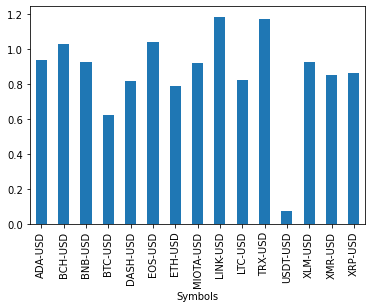

In [6]:
vol_data.plot(kind='bar')

In order to balance the risks associated with the portfolio, covariance between the stocks needs to be measured. A portfolio needs to have a perfect set of positively and negatively correlated stocks.

In [7]:
cov_matrix = pct_data.cov()
print(cov_matrix)

Symbols     ADA-USD   BCH-USD   BNB-USD   BTC-USD  DASH-USD   EOS-USD  \
Symbols                                                                 
ADA-USD    0.003531  0.002786  0.001892  0.001730  0.002310  0.003000   
BCH-USD    0.002786  0.004230  0.002128  0.002011  0.002575  0.003053   
BNB-USD    0.001892  0.002128  0.003423  0.001467  0.001822  0.002199   
BTC-USD    0.001730  0.002011  0.001467  0.001559  0.001630  0.001866   
DASH-USD   0.002310  0.002575  0.001822  0.001630  0.002685  0.002456   
EOS-USD    0.003000  0.003053  0.002199  0.001866  0.002456  0.004315   
ETH-USD    0.002412  0.002555  0.001805  0.001620  0.002124  0.002514   
MIOTA-USD  0.002615  0.002688  0.001878  0.001638  0.002319  0.002638   
LINK-USD   0.002304  0.002370  0.001841  0.001538  0.002056  0.002547   
LTC-USD    0.002381  0.002664  0.001952  0.001659  0.002133  0.002597   
TRX-USD    0.002881  0.002752  0.001962  0.001820  0.002424  0.003011   
USDT-USD   0.000019  0.000025  0.000022  0.000028  

In [8]:
corr_matrix = pct_data.corr()
print(corr_matrix)

Symbols     ADA-USD   BCH-USD   BNB-USD   BTC-USD  DASH-USD   EOS-USD  \
Symbols                                                                 
ADA-USD    1.000000  0.720979  0.544188  0.737547  0.750401  0.768625   
BCH-USD    0.720979  1.000000  0.559147  0.783281  0.764226  0.714702   
BNB-USD    0.544188  0.559147  1.000000  0.635258  0.600885  0.572081   
BTC-USD    0.737547  0.783281  0.635258  1.000000  0.796857  0.719524   
DASH-USD   0.750401  0.764226  0.600885  0.796857  1.000000  0.721587   
EOS-USD    0.768625  0.714702  0.572081  0.719524  0.721587  1.000000   
ETH-USD    0.813888  0.787584  0.618485  0.822661  0.821721  0.767383   
MIOTA-USD  0.754619  0.708721  0.550379  0.711471  0.767531  0.688732   
LINK-USD   0.516970  0.485704  0.419447  0.519318  0.528903  0.516846   
LTC-USD    0.768325  0.785267  0.639558  0.805598  0.789292  0.758181   
TRX-USD    0.652274  0.569419  0.451185  0.620369  0.629462  0.616736   
USDT-USD   0.067180  0.079946  0.078267  0.149010  

The formula to measure portfolio variance differs from that of calculating single stock variance.

In [22]:
weights = np.random.rand(len(df.columns)) 
sum_weights = sum(weights)
weights = weights/sum_weights
print(weights)

[0.02342252 0.10591838 0.02981513 0.02542763 0.08515094 0.09955949
 0.0444613  0.03924129 0.08927846 0.10875094 0.10889183 0.06715415
 0.08284504 0.01232397 0.07775893]


In [10]:
port_var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum() #portfolio variance
print(port_var)

0.001783587518992656


In [11]:
yearly_returns = df.resample('Y').last().pct_change().mean()
port_er = (weights*yearly_returns).sum()
port_er

0.0667424592541805

In [12]:
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)) #annual std dev
print(ann_sd)

Symbols
ADA-USD      0.939562
BCH-USD      1.028309
BNB-USD      0.925074
BTC-USD      0.624284
DASH-USD     0.819250
EOS-USD      1.038583
ETH-USD      0.788674
MIOTA-USD    0.922125
LINK-USD     1.186073
LTC-USD      0.824656
TRX-USD      1.175046
USDT-USD     0.075025
XLM-USD      0.927023
XMR-USD      0.849177
XRP-USD      0.863755
dtype: float64


In [13]:
assets = pd.concat([yearly_returns, ann_sd], axis=1)
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
ADA-USD,-0.571536,0.939562
BCH-USD,-0.292829,1.028309
BNB-USD,0.470339,0.925074
BTC-USD,0.093208,0.624284
DASH-USD,-0.701894,0.819250
EOS-USD,-0.350906,1.038583
ETH-USD,-0.425966,0.788674
MIOTA-USD,-0.725239,0.922125
LINK-USD,2.297250,1.186073


In [14]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000 #1000 random portfolios to plot efficient frontier

for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, yearly_returns) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)
    
t_data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    t_data[symbol+' weight'] = [w[counter] for w in p_weights]
    
portfolios  = pd.DataFrame(t_data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,ADA-USD weight,BCH-USD weight,BNB-USD weight,BTC-USD weight,DASH-USD weight,EOS-USD weight,ETH-USD weight,MIOTA-USD weight,LINK-USD weight,LTC-USD weight,TRX-USD weight,USDT-USD weight,XLM-USD weight,XMR-USD weight,XRP-USD weight
0,-0.149516,0.709838,0.045739,0.038418,0.092714,0.044817,0.089106,0.074173,0.070767,0.054585,0.067667,0.096027,0.110004,0.073004,0.022110,0.044118,0.076751
1,-0.166227,0.671986,0.022529,0.057294,0.124182,0.067636,0.052751,0.052881,0.105624,0.028732,0.046725,0.025180,0.074850,0.103501,0.081518,0.033980,0.122618
2,-0.091548,0.703154,0.064523,0.140719,0.059954,0.003413,0.027782,0.133040,0.083102,0.050047,0.090641,0.048575,0.046467,0.122654,0.001990,0.025313,0.101780
3,-0.171234,0.700468,0.068908,0.048648,0.060148,0.045144,0.097356,0.105671,0.006586,0.059614,0.076601,0.054319,0.048557,0.090928,0.078203,0.075042,0.084274
4,-0.327680,0.695806,0.006624,0.064289,0.025151,0.041839,0.109246,0.086950,0.087486,0.106387,0.033049,0.095282,0.012520,0.087164,0.072296,0.067530,0.104185


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

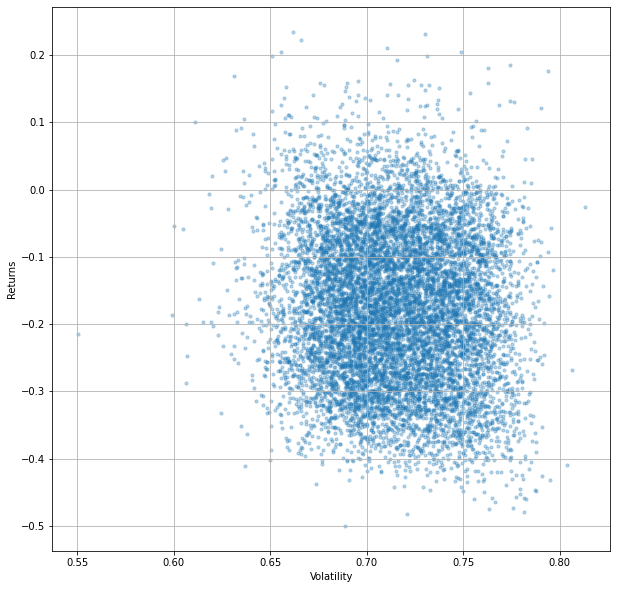

In [15]:
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

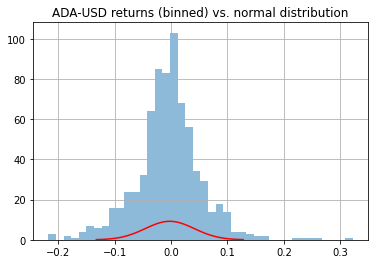

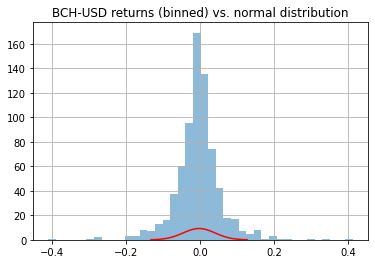

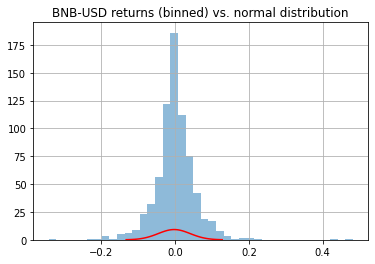

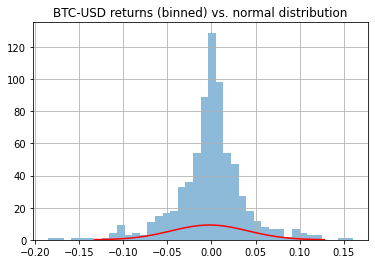

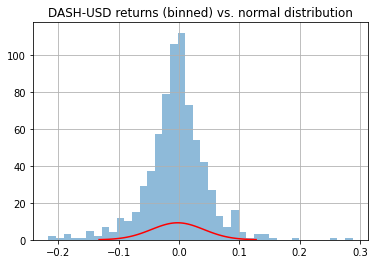

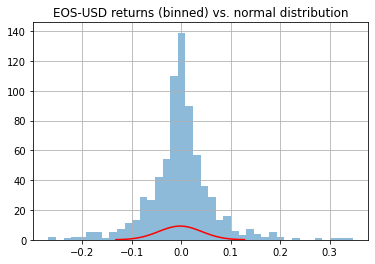

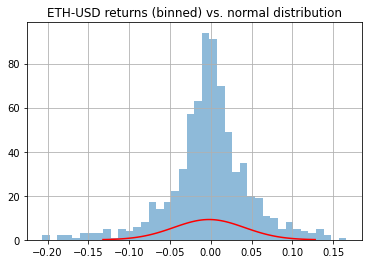

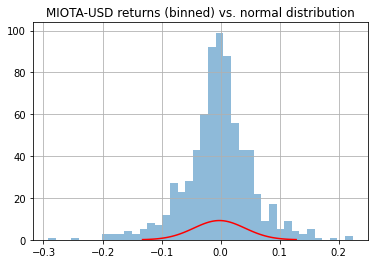

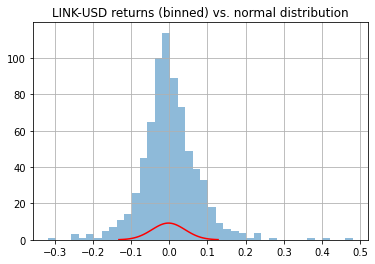

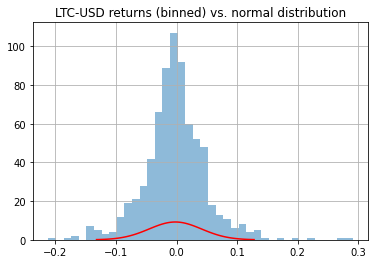

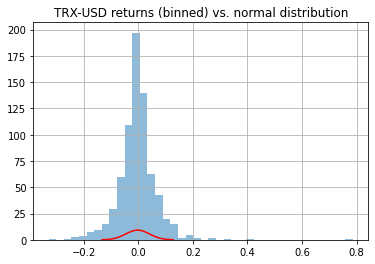

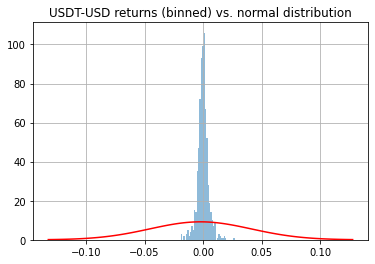

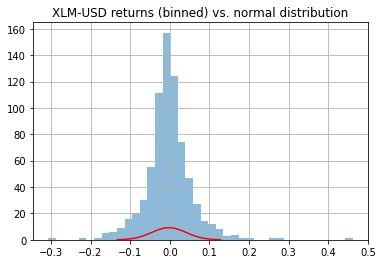

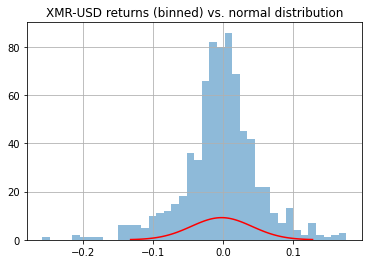

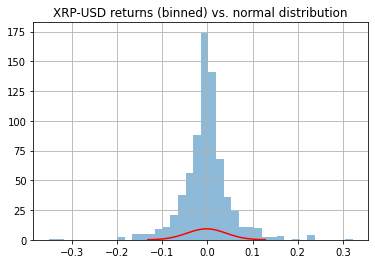

In [19]:
from scipy.stats import norm
avg_returns = pct_data.mean()
port_mean = avg_returns.dot(weights)
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)

stocks = ['ADA-USD', 'BCH-USD', 'BNB-USD', 'BTC-USD', 'DASH-USD', 'EOS-USD', 'ETH-USD', 'MIOTA-USD', 'LINK-USD', 'LTC-USD', 'TRX-USD', 'USDT-USD', 'XLM-USD', 'XMR-USD', 'XRP-USD']

for i in stocks:
    plt.plot(x, norm.pdf(x, port_mean, port_stdev), "r")
    pct_data[i].hist(bins=40,histtype="stepfilled",alpha=0.5)
    plt.title(i + " returns (binned) vs. normal distribution")
    plt.show()

As we can see, the returns of the stocks are far from normal, Efficient Frontier might not be the right technique in this case.
